# Funciones: arange, linspace , eye e indentity🧩
Con solo estas 4 funciones podremos generar:
 - Ejes temporales
 - Índices, días y horas
 - Variables dummy/one-hot encoding
 - Bases para simulaciones realistas

In [2]:
import numpy as np
import matplotlib.pyplot as ptl

np.random.seed(42)
print(f'Versión de la librería de NumPy: {np.__version__}')

Versión de la librería de NumPy: 2.3.5


## 1. Método ```np.arange()``` -__secuencias discretas__- El ```range()``` de Python pero vecotirzado.📘
```
np.arange(start, stop, step, dtype = None)
```
Su uso ideal es para generar secuencias enteras, índices, pasos fijos (todo lo relativo a __números enteros__). No usar cuando se necesita precisión con floats (todo relativo a __números de punto flotante__). 

In [14]:
dias_diciembre = np.arange(1, 32)
print(f'Tipo de objeto que se genera:\n{type(dias_diciembre)}')
print('-' * 75)
print(f'Tipo de datos que almacena: {dias_diciembre.dtype}')
print('-' * 75)
print(f'ndarray de NumPy generado:\n{dias_diciembre}')

Tipo de objeto que se genera:
<class 'numpy.ndarray'>
---------------------------------------------------------------------------
Tipo de datos que almacena: int64
---------------------------------------------------------------------------
ndarray de NumPy generado:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [ ]:
horas_dia = np.arange(24)
print(f'ndarray de NumPy generado:\n{horas_dia}')

ndarray de NumPy generado:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [18]:
cada_15_min = np.arange(0, 1440, 15)
print(f'ndarray generado para controlar sucesos cada 15 min:\n{cada_15_min}')

ndarray generado para controlar sucesos cada 15 min:
[   0   15   30   45   60   75   90  105  120  135  150  165  180  195
  210  225  240  255  270  285  300  315  330  345  360  375  390  405
  420  435  450  465  480  495  510  525  540  555  570  585  600  615
  630  645  660  675  690  705  720  735  750  765  780  795  810  825
  840  855  870  885  900  915  930  945  960  975  990 1005 1020 1035
 1050 1065 1080 1095 1110 1125 1140 1155 1170 1185 1200 1215 1230 1245
 1260 1275 1290 1305 1320 1335 1350 1365 1380 1395 1410 1425]


## 2. Método ```np.linspace()```- __secuencias contínuas__ 📘
 Ideal para ejes continuos, gráficos y simulaciones. No es recomendable usar cuando __no se sabe cuantos puntos queremos__.
```
np.linspace(start, stop, num = 50, endpoint = True, retstep = False, dtype = None)
```
 - Generar un array de ```num``` valores espaciados entres ```start``` y ```stop```. Ideal cuando se quiere una __cantidad fija__ de muestras entre dos extremos.
 - ```endpoint```: Determina si en valor final ```stop``` se incliye en el array de valores.
 - ```retstep```: En el caso de que es ```False``` devuelve solo el array de muestras y si es ```True``` devuelve un tupla ```(samples, step)```, donde este es la cdistancia entre elementos calulada.

In [30]:
t = np.linspace(0 , 10, 100, dtype = np.float64)
print(f'Distancia entre elementos (paso dado): {t[1] - t[0]}')
print(f'Último valor: {t[-1]}')
print('-' * 74)
print(f'Array generado:\n{t}')

Distancia entre elementos (paso dado): 0.10101010101010101
Último valor: 10.0
--------------------------------------------------------------------------
Array generado:
[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.

### 2.1. Caso real: simulación de ventas con tendencia + estacionalidad✨

In [39]:
dias = np.linspace(0, 364, 365) #2025 completo
print(f'Tipo de objeto: {type(dias)}')
print('-' * 80)
print(f'Dias del año:\n{dias}')


Tipo de objeto: <class 'numpy.ndarray'>
--------------------------------------------------------------------------------
Dias del año:
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 17

In [40]:
tendencia = 1000 + dias * 1.8 # Crea una tendencia lineal creciente, cada dia aumenta 1.8 unidades
print(f'Tipo de objeto: {type(tendencia)}')
print('-' * 80)
print(f'Tendencia:\n{tendencia}')

Tipo de objeto: <class 'numpy.ndarray'>
--------------------------------------------------------------------------------
Tendencia:
[1000.  1001.8 1003.6 1005.4 1007.2 1009.  1010.8 1012.6 1014.4 1016.2
 1018.  1019.8 1021.6 1023.4 1025.2 1027.  1028.8 1030.6 1032.4 1034.2
 1036.  1037.8 1039.6 1041.4 1043.2 1045.  1046.8 1048.6 1050.4 1052.2
 1054.  1055.8 1057.6 1059.4 1061.2 1063.  1064.8 1066.6 1068.4 1070.2
 1072.  1073.8 1075.6 1077.4 1079.2 1081.  1082.8 1084.6 1086.4 1088.2
 1090.  1091.8 1093.6 1095.4 1097.2 1099.  1100.8 1102.6 1104.4 1106.2
 1108.  1109.8 1111.6 1113.4 1115.2 1117.  1118.8 1120.6 1122.4 1124.2
 1126.  1127.8 1129.6 1131.4 1133.2 1135.  1136.8 1138.6 1140.4 1142.2
 1144.  1145.8 1147.6 1149.4 1151.2 1153.  1154.8 1156.6 1158.4 1160.2
 1162.  1163.8 1165.6 1167.4 1169.2 1171.  1172.8 1174.6 1176.4 1178.2
 1180.  1181.8 1183.6 1185.4 1187.2 1189.  1190.8 1192.6 1194.4 1196.2
 1198.  1199.8 1201.6 1203.4 1205.2 1207.  1208.8 1210.6 1212.4 1214.2
 1216.  1217.8 1

In [45]:
estacional = 300 * np.sin(2 * np.pi * dias / 365) # Genera un ciclo estacional (valorees entre -300 y 300) perfecto usando una función seno
print(f'Ciclo estacional:\n{ estacional }') 
print('-' * 80)
print(f'Tipo de objeto: {type(estacional)}')

Ciclo estacional:
[   0.            5.16400685   10.32648349   15.48590017   20.64072804
   25.78943962   30.93050923   36.06241347   41.18363163   46.2926462
   51.38794325   56.46801295   61.53134996   66.5764539    71.6018298
   76.60598853   81.58744726   86.54472986   91.4763674    96.38089851
  101.25686988  106.10283665  110.91736287  115.69902187  120.44639676
  125.15808078  129.83267777  134.46880252  139.06508127  143.62015203
  148.13266505  152.60128316  157.02468221  161.40155146  165.73059395
  170.01052689  174.24008204  178.41800609  182.54306103  186.61402453
  190.62969027  194.58886831  198.49038547  202.33308565  206.11583017
  209.83749812  213.49698668  217.09321149  220.62510689  224.09162631
  227.49174254  230.82444807  234.08875532  237.28369703  240.40832645
  243.4617177   246.44296599  249.35118791  252.18552169  254.94512746
  257.62918748  260.23690642  262.76751154  265.22025298  267.59440394
  269.8892609   272.10414384  274.23839646  276.29138631  278

In [46]:
ruido = np.random.normal(0, 80, 365) # Genera ruido aleatorio proveniente de una distribución normal (gaussiana)
print(f'Tipo de objeto: {type(ruido)}')
print('-' * 80)
print(f'Dias del año:\n{ruido}')

Tipo de objeto: <class 'numpy.ndarray'>
--------------------------------------------------------------------------------
Dias del año:
[  39.73713224  -11.06114409   51.81508305  121.84238851  -18.73226998
  -18.73095656  126.33702524   61.39477833  -37.55795087   43.40480349
  -37.07341542  -37.25838029   19.35698173 -153.06241957 -137.9934266
  -44.98300234  -81.02648963   25.13978661  -72.64192604 -112.98429611
  117.25190151  -18.06210404    5.40225638 -113.9798549   -43.55061796
    8.87380718  -92.07948619   30.05584147  -48.05109519  -23.33549998
  -48.13652898  148.18225476   -1.07977798  -84.61687432   65.80359297
  -97.667492     16.7090876  -156.77360991 -106.25488391   15.74889887
   59.0773264    13.7094625    -9.25186259  -24.08829565 -118.28175923
  -57.58753667  -36.85110168   84.5697781    27.48946317 -141.04321243
   25.92671755  -30.80658243  -54.15376002   48.93410311   82.4799618
   74.50240953  -67.13740186  -24.73699007   26.50107451   78.04361017
  -38.33393903 

In [47]:
# suma los tres componentes del modelo:
# 1. tendencia (crecimiento o decrecimiento general)
# 2. estacionalidad = subidas y bajadas periódicas
# 3. Ruido (aleatoriedad)
ventas_2025= tendencia + estacional + ruido
print(f'Ventas del 2025:\n{ventas_2025}')

Ventas del 2025:
[1039.73713224  995.90286275 1065.74156653 1142.72828868 1009.10845806
 1016.05848307 1168.06753447 1110.0571918  1018.02568076 1105.89744969
 1032.31452783 1039.00963267 1102.48833169  936.91403433  958.8084032
 1058.6229862  1029.36095763 1142.28451647 1051.23444136 1017.5966024
 1254.50877139 1125.84073261 1155.91961924 1043.11916698 1120.0957788
 1179.03188796 1084.55319157 1213.12464399 1141.41398608 1172.48465205
 1153.99613607 1356.58353792 1213.54490423 1136.18467715 1292.73418692
 1135.34303489 1255.74916964 1088.24439618 1144.68817712 1272.5629234
 1321.70701667 1282.09833081 1264.83852288 1255.64479    1167.03407094
 1233.24996144 1259.44588501 1386.26298959 1334.51457005 1171.24841388
 1343.4184601  1291.81786563 1273.5349953  1381.61780013 1420.08828825
 1416.96412723 1280.10556413 1327.21419784 1383.0865962  1439.18873763
 1327.29524846 1355.18418829 1285.86071362 1282.92372306 1447.79646973
 1495.38846318 1385.14333411 1475.12102829 1427.62226832 1350.85

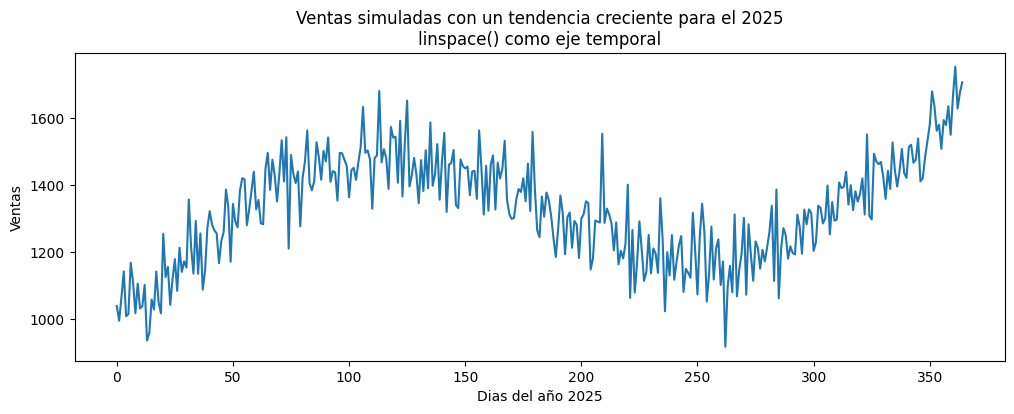

In [48]:
# Graficamos
ptl.figure(figsize=(12, 4))
ptl.plot(dias, ventas_2025)
ptl.title("Ventas simuladas con un tendencia creciente para el 2025\nlinspace() como eje temporal")
ptl.xlabel('Dias del año 2025')
ptl.ylabel('Ventas')
ptl.show()

 - ```endpoint = False```: cuando queremos __bins (intervalos en lo se divide un rango de valores)__ abierto por la derecha.

In [52]:
# Correcto para histogramas
bins = np.linspace(0,100, 11, False) #  Intervalos con rango de la forma [a, b>
print(f'Bins abiertos por la derecha:\n{bins}')


Bins abiertos por la derecha:
[ 0.          9.09090909 18.18181818 27.27272727 36.36363636 45.45454545
 54.54545455 63.63636364 72.72727273 81.81818182 90.90909091]


## 3. ```np.eye()``` y ```np.identity()``` - __matrices identidad__ y __one-hot encoding__ 📘 
```
np.eye(N, M = None, k=0, dtype = float)
np.identity (n, dtype = None)
```
 - __```np.eye()```__ Crea una __matriz identidad generalizada__(cuadrado o rectangular- __flexible__), con la diagonal dezplazada donde queramos. ütil para __one-hot encoding__ (convertir datos categorias a numeros, creando columnas binarias donde cada columna representea una categoría), matrices identidad.
 - __```np.identity()```:__ Solo crea matrices identidad cuadradas (__rígidad__)

### 3.1. One_hot encoding manual

In [58]:
categorias = np.array([0, 2, 1, 2, 0, 1, 2, 0, 2, 1])
# Validación obligatoria en producción (Según las reglas de negocio)
assert categorias.min() >= 0 and categorias.max() < 3, "Categoria fuera de rango"
one_hot = np.eye(3, dtype=np.int8) [categorias] #Indexación de la matriz identidad con el arreglo categorias (fany indexing -indexación elegante)
#Cada valor de en "categorias" actua como índice de fila sobre la matriz identidad
print(f'One-hot econding:\n{one_hot}')

One-hot econding:
[[1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


### 3.2 Selección de columnas con eye

In [4]:
# Seleccionar solo columnas 1 y 3 de un matriz
matriz = np.random.rand(10, 5)
print(f'Matriz inicial:\n{matriz}')
print('-' * 60)
selector = np.eye(5, dtype=bool) [[1, 3]] # fancy indexing
print(f'Matriz selector:\n{selector}')
print('-' * 60)
columnas = matriz @  selector.T # El @ se interpreta como multiplicacipon matricial
print(f'Columnas 1 y 3:\n{columnas}')

Matriz inicial:
[[0.96958463 0.77513282 0.93949894 0.89482735 0.59789998]
 [0.92187424 0.0884925  0.19598286 0.04522729 0.32533033]
 [0.38867729 0.27134903 0.82873751 0.35675333 0.28093451]
 [0.54269608 0.14092422 0.80219698 0.07455064 0.98688694]
 [0.77224477 0.19871568 0.00552212 0.81546143 0.70685734]
 [0.72900717 0.77127035 0.07404465 0.35846573 0.11586906]
 [0.86310343 0.62329813 0.33089802 0.06355835 0.31098232]
 [0.32518332 0.72960618 0.63755747 0.88721274 0.47221493]
 [0.11959425 0.71324479 0.76078505 0.5612772  0.77096718]
 [0.4937956  0.52273283 0.42754102 0.02541913 0.10789143]]
------------------------------------------------------------
Matriz selector:
[[False  True False False False]
 [False False False  True False]]
------------------------------------------------------------
Columnas 1 y 3:
[[0.77513282 0.89482735]
 [0.0884925  0.04522729]
 [0.27134903 0.35675333]
 [0.14092422 0.07455064]
 [0.19871568 0.81546143]
 [0.77127035 0.35846573]
 [0.62329813 0.06355835]
 [0.72

### 3.3.Patrón: ```np.arange()``` + ```np.reshape()```

In [6]:
#crea vector columna de dias (usado en ML y merge)
dias = np.arange(1, 32).reshape(-1, 1)
print(f'Matriz de días:\n{dias}')
print('-' * 50)
print(f'Dimesiones: {dias.shape}')
print('-' * 50)
dias[:5].flatten()

Matriz de días:
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]]
--------------------------------------------------
Dimesiones: (31, 1)
--------------------------------------------------


array([1, 2, 3, 4, 5])

## 3. Ejercicios prácticos⚡
 - Días laborales 2025. Simulamos artificialmente: 0 = lunes, 1 = martes, ..., 6 = domingo para todos los días del año 2025. 

In [14]:
dias_anio_2025 = np.arange(365)
print(f'Todos los días del año:\n{dias_anio_2025}')
print('-' * 80)
#Convertimos un día del año a un día de la semana simulado (broadcasting)
dias_semana  = dias_anio_2025 % 7
print(f'Días de la semana en todo el año:\n{dias_semana}')
print('-' * 80)
#Dias laborables (los días de lunes a viernes), se excluyen los sábado y domingos (boolean masking + fancy indexing)
# En NumPy se necesita forzosamente agrupar
laborables  = dias_anio_2025[ (dias_semana >= 0) & (dias_semana <= 4)]
print(f'Días laborables en todo el año:\n{laborables}')


Todos los días del año:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 24

 - Sensor IoT 24h

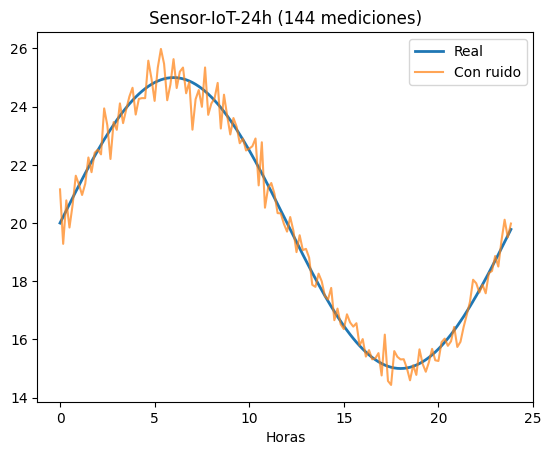

In [22]:
# 1 medición cada 10 minutos - 144 puntos
tiempo = np.linspace(0, 24, 144, endpoint=False, dtype=np.float64)
temp_real = 20 + 5 * np.sin(2 * np.pi * tiempo / 24)
temp_medida = temp_real + np.random.normal(0, 0.5, len(tiempo))
temp_medida.astype(dtype = np.float64)

ptl.Figure(figsize=(12, 4))
ptl.plot(tiempo, temp_real, label = "Real", lw = 2) #Variación senoidal
ptl.plot(tiempo, temp_medida, label = "Con ruido", alpha = 0.7) #Se anade un ruido gaussiano
ptl.legend()
ptl.title("Sensor-IoT-24h (144 mediciones)")
ptl.xlabel('Horas')
ptl.show()

 - One_hot con validación real

In [44]:
categorias_error = np.array([0, 2, 1, 2, 0, 1, 2, 0, 2, 5], dtype=np.int16)  # ¡5 es inválido!
assert (categorias_error.min() >= 0 ) & (categorias_error.max() <=3), "Categoría fuera de rango"


AssertionError: Categoría fuera de rango

In [45]:
one_hot = np.zeros((len(categorias_error), 3), dtype = np.int16)
one_hot = (categorias_error >= 0) & (categorias_error <= 3)
print(f'Categorías filtradas:\n{one_hot}')
categorias_sin_error = np.where(
    (categorias_error >= 0) & (categorias_error <= 2),
    categorias_error,
    "Categoria_invalida",
    )
array_categorias_sin_error = np.array(categorias_sin_error)
print(f'Categorías:\n{array_categorias_sin_error}')


Categorías filtradas:
[ True  True  True  True  True  True  True  True  True False]
Categorías:
['0' '2' '1' '2' '0' '1' '2' '0' '2' 'Categoria_invalida']


 - Bins perfectos para segmentación

In [51]:
gastos = np.random.lognormal(mean = 8, sigma = 0.8, size = 10_000)
print(f'Gastos:\n{gastos}')
print('-' * 80)
bins_malos = np.linspace(gastos.min(), gastos.max(), 6)
print(f'Bins malos:\n{bins_malos}')
print('-' * 80)
bins_buenos = np.percentile(gastos, [0, 20, 40, 60, 80, 100])
print(f'Bins bueno (bins cualtílicos)s:\n{bins_buenos}')

Gastos:
[1656.32972359 1692.68820568 2168.06137848 ... 1595.47074284 1848.88073955
 9724.58129595]
--------------------------------------------------------------------------------
Bins malos:
[  107.10534663 12016.32797609 23925.55060554 35834.77323499
 47743.99586445 59653.2184939 ]
--------------------------------------------------------------------------------
Bins bueno (bins cualtílicos)s:
[  107.10534663  1517.91434951  2418.91742334  3678.33796021
  5919.01842291 59653.2184939 ]


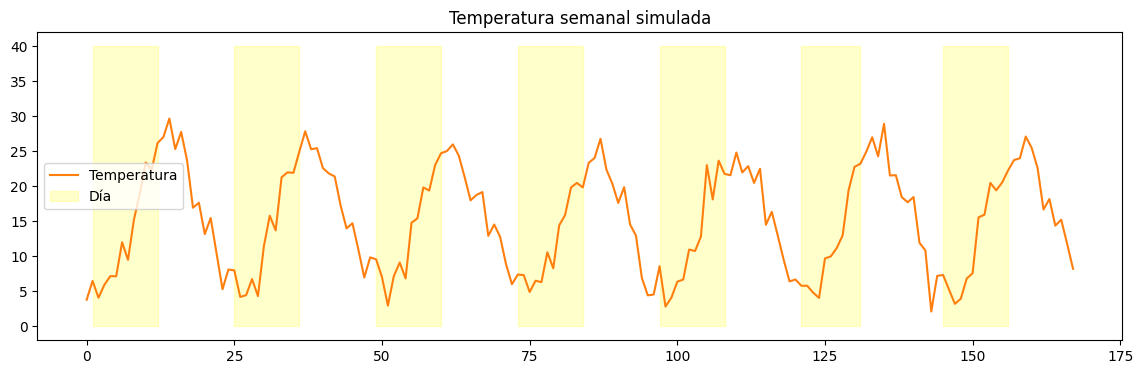

In [53]:
# Simula temperatura exterior durante 7 días (medición cada hora)
horas = np.linspace(0 , 7*24, 7*24, endpoint=False)
temp = 15 + 10 * np.sin(2 * np.pi * (horas -8) / 24 ) + np.random.normal(0, 2, len(horas))
# Crea variable "es_de_dia" usando seno (o masking)
es_de_dia = np.sin(2 * np.pi * horas/24) > 0

ptl.figure(figsize=(14, 4))
ptl.plot( horas, temp, label = "Temperatura", color  = "tab:orange")
ptl.fill_between(horas, 0, 40, where= es_de_dia, alpha = 0.2, color = "yellow", label = "Día")
ptl.legend()
ptl.title("Temperatura semanal simulada")
ptl.show()